### Dependencies

In [59]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

### Load Data

In [18]:
dir = "C:/Users/emuli/OneDrive/Documents/R/Projects/Pokemon/pokemon.csv"
pokemon_raw = pd.read_csv(dir)
pokemon_raw = pd.DataFrame(pokemon_raw)
# iris = sns.load_dataset('iris')

### View Data Frame

In [36]:
# pokemon_raw.info()
# pokemon_raw.head()
# pokemon_raw.describe()

# pokemon_raw.shape
# pokemon_raw.index
# pokemon_raw.values
# pokemon_raw.axes
# pokemon_raw.keys()

# pokemon_raw['Type 1'].value_counts()
# pokemon_raw['Total'].max()
# pokemon_raw['Total'].sum()

# pokemon.dropna()

# pokemon_raw['Type 1'] == 'Fire'

### Filter Data Frame

In [51]:
# filter by rows
# pokemon_raw[pokemon_raw['Type 1'] == 'Fire']

# sort by values
# pokemon_raw.sort_values(by = ['Type 1'], inplace = True)

In [146]:
test = pokemon_raw.groupby(['Type 1'])
test.describe()
test.describe().transpose()
test.mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,,
Bug,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000
Dark,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516
Dragon,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000
Electric,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824
Fighting,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000
Fire,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154
Flying,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000
Ghost,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500


### Data Visualization

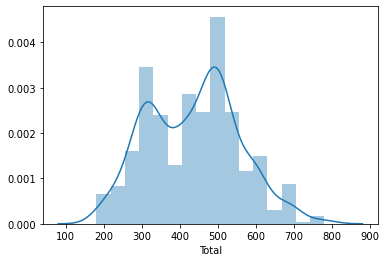

In [57]:
# histogram
sns.distplot(pokemon_raw['Total'])

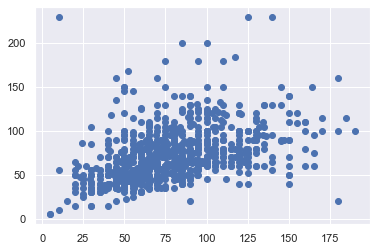

In [63]:
# scatterplot
plt.scatter(pokemon_raw['Attack'], pokemon_raw['Defense'])
plt.show()

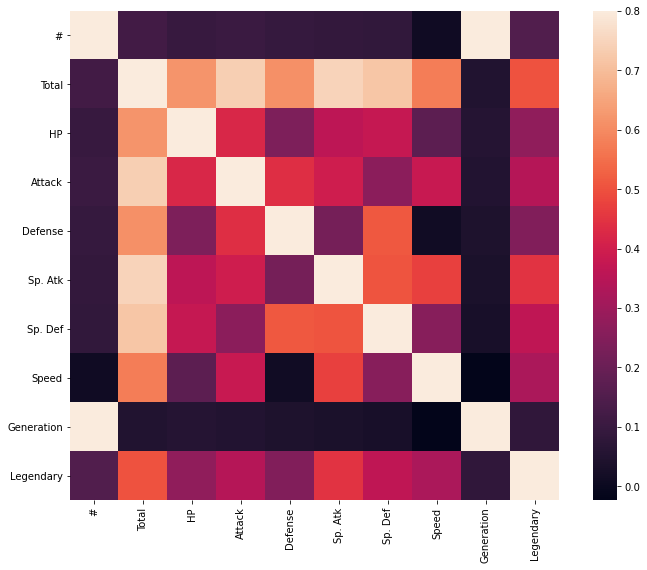

In [60]:
# correlation matrix
corrmat = pokemon_raw.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

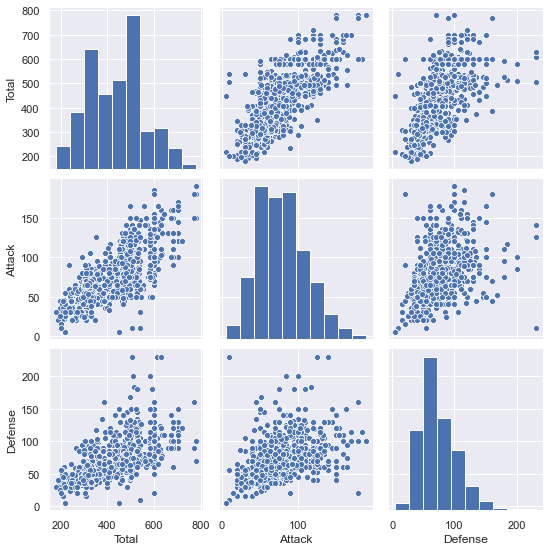

In [62]:
# pair plot 
sns.set()
cols = ['Total', 'Attack', 'Defense']
sns.pairplot(pokemon_raw[cols], size = 2.5)
plt.show();

### Separe Training and Testing Data

In [166]:
# split training and testing data
from sklearn.model_selection import train_test_split
train, test = train_test_split(pokemon_raw, test_size = .2)

col_remove = ['#', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary']
train = train.drop(col_remove, 1)
test = test.drop(col_remove, 1)

col_feature = 'Total'
train_labels = train[col_feature]
train_features = train.loc[:, train.columns != 'Total' ]
test_labels = test[col_feature]
test_features = test.loc[:, test.columns != 'Total']

# train_features = np.reshape(train_features.shape[0], 1, train_features.shape[1])
# test_features = np.reshape(test_features.shape[0], 1, test_features.shape[1])

### Data Preprocessing

In [205]:
# data preprocessing

# train.axes
# train.shape
# train.keys()


# one hot encoder for categorical variable

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

In [218]:
# normalize data
train_stats = train_features.describe().transpose()

def normalizeData(x):
    return (x - train_stats['mean'] / train_stats['std'])

train_features_norm = normalizeData(train_features)
test_features_norm = normalizeData(test_features)


### Modelling

In [210]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# train_features.shape

model = Sequential([
    Dense(64, input_shape = [len(train_features.keys())] , activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(1)
])

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 64)                448       
_________________________________________________________________
dense_106 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


### Training Model

In [219]:
# train
from numpy.random import seed
seed(420)

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

model.fit(train_features_norm, train_labels, epochs = 5, batch_size = 32)


Epoch 1/5
640/640 [==============================] - 0s 58us/step - loss: 105.4875 - accuracy: 0.0469
Epoch 2/5
640/640 [==============================] - 0s 47us/step - loss: 79.3697 - accuracy: 0.0234
Epoch 3/5
640/640 [==============================] - 0s 45us/step - loss: 80.0203 - accuracy: 0.0375
Epoch 4/5
640/640 [==============================] - 0s 47us/step - loss: 91.7966 - accuracy: 0.0422
Epoch 5/5
640/640 [==============================] - 0s 75us/step - loss: 83.9372 - accuracy: 0.0344


### Testing Model

In [220]:
# test

model.evaluate(test_features_norm, test_labels, batch_size = 16)

160/160 [==============================] - 0s 492us/step


[38.65972633361817, 0.06875000149011612]

### Predict Values

In [222]:
# predict

model.predict(test_features, test_labels)


TypeError: 'Series' object cannot be interpreted as an integer